# Seismic noise plot
Plotting seismic noise. ObsPy, numpy, pandas, matplotlib are required.

## Import NumPy, matplotlib, pandas, obspy module

In [1]:
import numpy as np
import matplotlib as mpl
import pandas as pd
import obspy as op

print("# numpy version = ",np.__version__)
print("# matplotlib version = ",mpl.__version__)
print("# pandas version = ",pd.__version__)
print("# numpy version = ",np.__version__)
print("# obspy version = ",op.__version__)

import matplotlib.pyplot as plt
from obspy import UTCDateTime



# numpy version =  1.19.1
# matplotlib version =  3.3.1
# pandas version =  1.0.4
# numpy version =  1.19.1
# obspy version =  1.2.2


## Frequency band
This example uses a 4.0-14.0 passband 

In [2]:
band = "4.0-14.0"

## Location of CSV file 
This example uses the ftp directory

In [3]:
csv_dir = "http://ncedc.org/ftp/outgoing/taira/EastBay_seismic_noise"


## Station information
This example uses BK.BRK.00.HHZ

In [4]:
net = "BK" # network ID
sta = "BRK" # station ID
#sta = "BKS"
loc = "00" # location ID
com = "HHZ" # channel ID

nslc = net+"."+sta+"."+loc+"."+com
print("# nslc = ", nslc)

# nslc =  BK.BRK.00.HHZ


## CSV file
This csv file includes seismic noise at several different frequency bands. Timestamp is UTC

In [5]:
csv_fi = csv_dir+"/"+net+"."+sta+"."+loc+"."+com+".csv"


## "RS" CSV file
This rs csv file includes 1-day median noise level (from 6am through 4pm at local time) at the 4.0-14.0 Hz. Timestamp is UTC

In [6]:
#http://ncedc.org/ftp/outgoing/taira/EastBay_seismic_noise/BK.BRK.00.HHZ_4.0-14.0_rs.csv
rs_csv_fi = csv_dir+"/"+net+"."+sta+"."+loc+"."+com+"_"+band+"_rs.csv"


## Read "RS" CSV file
This RS csv file is output from Thomas's code

In [7]:
rs_csv_data = pd.read_csv(rs_csv_fi,   
                       sep=",", index_col=0)
#print(rs_csv_data)
rs_csv_data['time'] = pd.to_datetime(rs_csv_data.index)

#print(rs_csv_data['time'])

In [8]:
print(rs_csv_data)

                         4.0-14.0                time
2017-12-31 12:00:00  1.029442e-09 2017-12-31 12:00:00
2018-01-01 12:00:00  1.172483e-09 2018-01-01 12:00:00
2018-01-02 12:00:00  1.958951e-09 2018-01-02 12:00:00
2018-01-03 12:00:00  1.997294e-09 2018-01-03 12:00:00
2018-01-04 12:00:00  1.703240e-09 2018-01-04 12:00:00
...                           ...                 ...
2020-08-11 12:00:00  1.884959e-09 2020-08-11 12:00:00
2020-08-12 12:00:00  1.477492e-09 2020-08-12 12:00:00
2020-08-13 12:00:00  1.505339e-09 2020-08-13 12:00:00
2020-08-14 12:00:00  1.601330e-09 2020-08-14 12:00:00
2020-08-15 12:00:00  1.195192e-09 2020-08-15 12:00:00

[959 rows x 2 columns]


## Read CSV file

In [9]:
csv_data = pd.read_csv(csv_fi,   
                       sep=",", index_col=0)

csv_data['time'] = pd.to_datetime(csv_data.index)

print(csv_data)




                                 0.1-1.0      1.0-20.0      4.0-14.0  \
2018-01-01 00:00:00.008393  1.367721e-07  2.087623e-09  1.029630e-09   
2018-01-01 00:15:00.008393  1.310898e-07  2.069405e-09  1.029254e-09   
2018-01-01 00:30:00.008393  1.238719e-07  2.122415e-09  1.026256e-09   
2018-01-01 00:45:00.008393  1.279382e-07  2.018117e-09  1.027098e-09   
2018-01-01 01:00:00.008393  1.392111e-07  1.991060e-09  1.020509e-09   
...                                  ...           ...           ...   
2020-08-15 22:29:58.998393  1.180592e-07  2.558639e-09  1.214478e-09   
2020-08-15 22:44:58.998393  1.097889e-07  2.577038e-09  1.227296e-09   
2020-08-15 22:59:58.998393  1.114697e-07  2.603679e-09  1.206588e-09   
2020-08-15 23:14:58.998393  1.109649e-07  2.624908e-09  1.206718e-09   
2020-08-15 23:29:58.998393  1.071689e-07  2.589852e-09  1.198513e-09   

                                4.0-20.0                       time  
2018-01-01 00:00:00.008393  1.061267e-09 2018-01-01 00:00:00.0083

## Use "time" as index (again?) 
not fully understand but I follow an example page from
https://qiita.com/StingQian/items/0030ef9e3c23cce17c76 (in Japanese)

In [10]:
csv_data = csv_data.set_index('time')
csv_data.index = pd.to_datetime(csv_data.index)


In [11]:
csv_data.index

DatetimeIndex(['2018-01-01 00:00:00.008393', '2018-01-01 00:15:00.008393',
               '2018-01-01 00:30:00.008393', '2018-01-01 00:45:00.008393',
               '2018-01-01 01:00:00.008393', '2018-01-01 01:15:00.008393',
               '2018-01-01 01:30:00.008393', '2018-01-01 01:45:00.008393',
               '2018-01-01 02:00:00.008393', '2018-01-01 02:15:00.008393',
               ...
               '2020-08-15 21:14:58.998393', '2020-08-15 21:29:58.998393',
               '2020-08-15 21:44:58.998393', '2020-08-15 21:59:58.998393',
               '2020-08-15 22:14:58.998393', '2020-08-15 22:29:58.998393',
               '2020-08-15 22:44:58.998393', '2020-08-15 22:59:58.998393',
               '2020-08-15 23:14:58.998393', '2020-08-15 23:29:58.998393'],
              dtype='datetime64[ns]', name='time', length=91871, freq=None)

## function localize_tz_and_reindex

This function from Thomas's code. convert UTC to local time zone and then reampling with a moving mean process 

In [12]:
def localize_tz_and_reindex(df, freq="15Min", time_zone = "Europe/Brussels"):
    #return df.copy().tz_localize("UTC").dropna().tz_convert(time_zone).tz_localize(None).resample(freq).mean().to_frame()
    return df.copy().tz_localize("UTC").dropna().tz_convert(time_zone).tz_localize(None).resample(freq).mean()


## Define time zone
our time zone is "America/Los_angelse"

In [13]:
time_zone = 'America/Los_Angeles'


## compute 30-min-mean data and convert local time zone
This 30-min0mean used in Thomas's code

In [14]:
csv_data_30min_mean = localize_tz_and_reindex(csv_data, "30Min", time_zone = time_zone)

## Extract 6am-4pm data at local time

In [15]:
rs_local = csv_data_30min_mean.copy().between_time("6:00", "16:00")

## Compute daily mean from 6am-4pm data

In [16]:
rs_local = rs_local.resample("1D" ).median().tshift(12, "H")


## Redefine time zone
This is not include in Thomas's code. I added it so that we can plot resuls with local timestamp


In [17]:
rs_local.index = rs_local.index.tz_localize('America/Los_Angeles')# add this is UTC

## plot Thomas's output (orange) and our result (green)


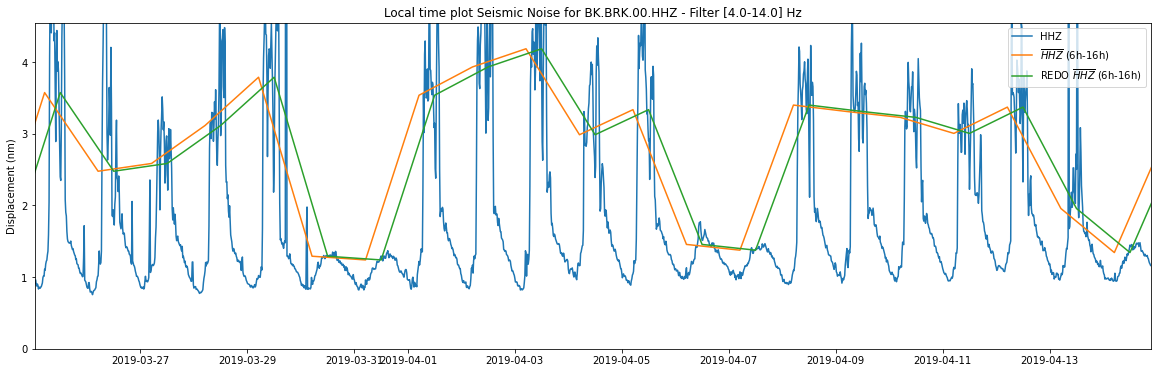

In [18]:
plt.figure(figsize=(20, 6))

# 1e+9 for conveting meter -> nanometer
#plt.plot(csv_data['time'], csv_data[band]*1e+9, label=com)
plt.plot(csv_data.index, csv_data[band]*1e+9, label=com)
plt.plot(rs_csv_data['time'], rs_csv_data[band]*1e+9, label="$\overline{"+com+"}$ (6h-16h)")
plt.plot(rs_local.index, rs_local[band]*1e+9, label="REDO $\overline{"+com+"}$ (6h-16h)")
#plt.plot(rs_local_test.index, rs_local_test[band]*1e+9, label="REDO $\overline{"+com+"}$ (6h-16h)")

#plt.ylim(0.75,3)
ymin = 0
ymax = np.nanpercentile(csv_data[band]*1e+9,95)*1.5
plt.ylim(ymin, ymax)

#2020-03-17 00:00":'BayArea shelter-in-place order' local time
plt.vlines(x=(UTCDateTime("2020-03-17 07:00").datetime), ymin=ymin, ymax=ymax, color="red", linewidth = 2.0, linestyle = "--")




#plt.xlim(csv_data['time'][0], csv_data['time'][-1])
#plt.xlim(csv_data.index[0], csv_data.index[-1])
plt.xlim(csv_data.index[43000], csv_data.index[45000])
#plt.xlim(csv_data.index[43000], csv_data.index[43500])
#plt.xlim(csv_data.index[43000], csv_data.index[43200])

plt.ylabel("Displacement (nm)")
plt.title("Local time plot Seismic Noise for "+nslc+" - Filter ["+band+"] Hz")


plt.legend(loc = "upper right")
plt.savefig(nslc+"_"+band+".png")


## Check if Thomas's output and our output is the same

In [19]:
index=401 # 
index=252 # 

In [25]:
#rs_csv_data['time'][index]

In [26]:
#rs_local.index[index]

In [27]:
#rs_local[band][index]

In [28]:
#rs_csv_data[band][index]

## if Thomas output = our output, then we will get zero

In [29]:
rs_csv_data[band][index]-rs_local[band][index]

0.0